<a href="https://colab.research.google.com/github/myz21/BILTEK-AI/blob/master/Assigment6_23050151035.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Muhammed Yıldız, 23050151035

##ASSIGMENT 6

####My student number ends with 3, so I work on from 5th student to 14th student.

#####First attempt: We are trying to predict final grades using only homework grades.

In [9]:
import numpy as np

#Creating 10x2 matrix
homework = np.array([[1,51],[1,39],[1,18],[1,88],[1,48],[1,68],[1,69],[1,60],[1,64],[1,61]])

#Creating 10-vector of final grades
final_grades = np.array([[20],[62],[35],[65],[54],[46],[42],[27],[53],[48]])

In [7]:
#We trying to find pseudo-inverse of homework matrix
pinv_homework = np.linalg.pinv(homework)

#Printing pinv_homework
print(pinv_homework)

[[ 0.19721507  0.40553306  0.77008956 -0.44509876  0.24929457 -0.0979021
  -0.11526193  0.04097657 -0.02846277  0.02361673]
 [-0.00171758 -0.00539811 -0.01183904  0.00963072 -0.00263771  0.0034965
   0.00380321  0.00104282  0.00226966  0.00134953]]


In [11]:
#Multiplying pinv_homework with final_grades for finding constant
constants = pinv_homework @ final_grades
print(constants)

[[31.95791927]
 [ 0.23395902]]


In [12]:
#Finding predicted final grades
prediction_final1 = homework @ constants
print(prediction_final1)

[[43.88982947]
 [41.08232119]
 [36.1691817 ]
 [52.54631334]
 [43.1879524 ]
 [47.86713287]
 [48.10109189]
 [45.99546068]
 [46.93129677]
 [46.2294197 ]]


In [13]:
  #Calculating rms error
  rms_error1 = np.sqrt(np.mean((final_grades - prediction_final1)**2))
  print(rms_error1)

13.12682770864892


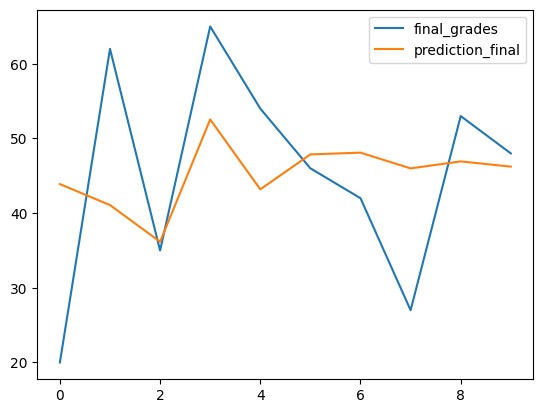

In [17]:
import matplotlib.pyplot as plt
#We plotting row num vs final_grades and row num vs prediction_final
#X-axis will be student5 to student 14
#Y-axis will be grades
plt.plot(final_grades, label='final_grades')
plt.plot(prediction_final1, label='prediction_final')
plt.legend()
plt.show()



#####Second attempt: This time use midterm grades to predict final grades.

In [18]:
#Creating 10x2 matrix
midterm = np.array([[1,25],[1,61],[1,83],[1,74],[1,62],[1,78],[1,56],[1,5],[1,55],[1,29]])

#We trying to find pseudo-inverse of midterm matrix
pinv_midterm = np.linalg.pinv(midterm)

#Printing pinv_midterm
print(pinv_midterm)

[[ 3.53618080e-01  2.51917893e-02 -1.75513166e-01 -9.34065934e-02
   1.60688368e-02 -1.29898403e-01  7.08065519e-02  5.36077130e-01
   7.99295045e-02  3.17126270e-01]
 [-4.80337273e-03  1.41682217e-03  5.21805239e-03  3.66300366e-03
   1.58960536e-03  4.35413643e-03  5.52906213e-04 -8.25903656e-03
   3.80123022e-04 -4.11223996e-03]]


In [19]:
#Multiplying pinv_midterm with final_grades for finding constants
constants2 = pinv_midterm @ final_grades
print(constants2)

[[28.21853618]
 [ 0.32161863]]


In [20]:
#c2 = 28.21 and c1 = 0.321

#Finding predicted final grades
prediction_final2 = midterm @ constants2
#Printing predicted final grades
print(prediction_final2)

[[36.259002  ]
 [47.83727279]
 [54.91288271]
 [52.01831502]
 [48.15889142]
 [53.30478955]
 [46.22917963]
 [29.82662935]
 [45.90756099]
 [37.54547654]]


In [21]:
  #Calculating rms error
  rms_error2 = np.sqrt(np.mean((final_grades - prediction_final2)**2))
  print(rms_error2)

11.414635678139815


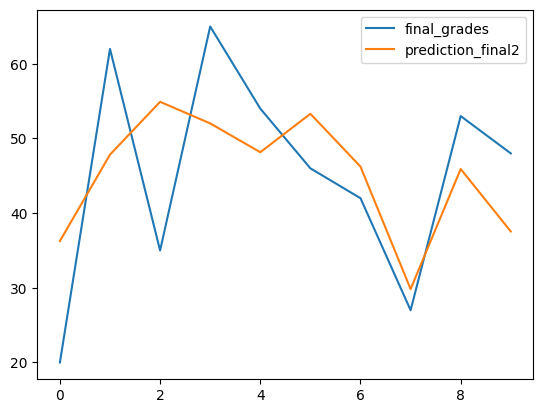

In [30]:
#We plotting row num vs final_grades and row num vs prediction_final
#X-axis will be student5 to student 14
#Y-axis will be grades
plt.plot(final_grades, label='final_grades')
plt.plot(prediction_final2, label='prediction_final2')
plt.legend()
plt.show()

#####Third attempt: We will use both homework and midterm grades to predict the final grades.

In [23]:
#We creating 10x3 matrix
midterm_hw = [
    (51, 25, 1),  # Student 5
    (39, 61, 1),  # Student 6
    (18, 83, 1),  # Student 7
    (88, 74, 1),  # Student 8
    (48, 62, 1),  # Student 9
    (68, 78, 1),  # Student 10
    (69, 56, 1),  # Student 11
    (60, 5, 1),   # Student 12
    (64, 55, 1),  # Student 13
    (61, 29, 1)   # Student 14
]

#We trying to find pseudo-inverse of midterm_hw matrix
pinv_midterm_hw = np.linalg.pinv(midterm_hw)

#Printing pinv_midterm_hw
print(pinv_midterm_hw)

[[-2.47383193e-03 -5.25171113e-03 -1.11954441e-02  1.03154689e-02
  -2.42907141e-03  4.20720957e-03  3.93707893e-03 -2.05614940e-04
   2.35721193e-03  7.38704231e-04]
 [-5.01358604e-03  9.70559207e-04  4.26672206e-03  4.53955830e-03
   1.38319557e-03  4.71164311e-03  8.87458604e-04 -8.27650864e-03
   5.80426572e-04 -4.04946874e-03]
 [ 5.04736230e-01  3.46001324e-01  5.08379214e-01 -7.23544217e-01
   1.64452716e-01 -3.86902818e-01 -1.69696482e-01  5.48637462e-01
  -6.40647184e-02  2.72001290e-01]]


In [24]:
#Multiplying pinv_midterm_hw with final_grades for finding constant
constants3 = pinv_midterm_hw @ final_grades
print(constants3)

[[ 0.28613974]
 [ 0.34593329]
 [10.73921315]]


In [25]:
#[[ 0.28613974] c1
#[ 0.34593329] c2
#[10.73921315]] c3

In [26]:
#Finding predicted final grades
prediction_final3 = midterm_hw @ constants3
#Printing predicted final grades
print(prediction_final3)

[[33.98067196]
 [43.00059365]
 [44.60219164]
 [61.51857348]
 [45.92178456]
 [57.17951195]
 [49.85511925]
 [29.63726373]
 [48.07848728]
 [38.22580248]]


In [27]:
  #Calculating rms error
  rms_error3 = np.sqrt(np.mean((final_grades - prediction_final3)**2))
  print(rms_error3)

10.195157575116461


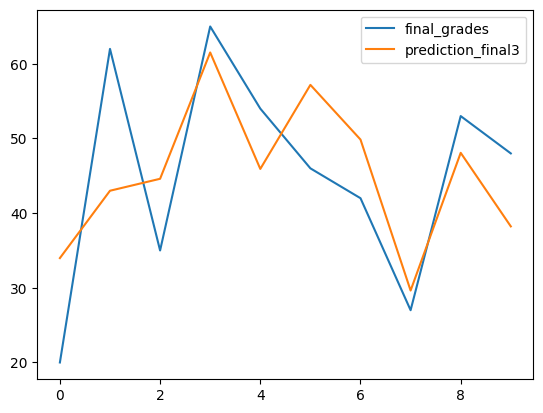

In [31]:
#We plotting row num vs final_grades and row num vs prediction_final3
#X-axis will be student5 to student 14
#Y-axis will be grades
plt.plot(final_grades, label='final_grades')
plt.plot(prediction_final3, label='prediction_final3')
plt.legend()
plt.show()

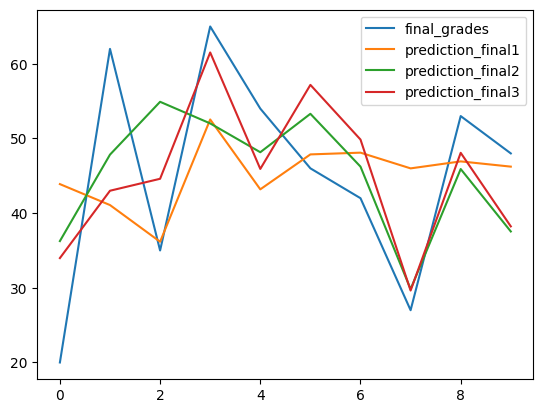

In [32]:
#We plotting all predictions in one graph
plt.plot(final_grades, label='final_grades')
plt.plot(prediction_final1, label='prediction_final1')
plt.plot(prediction_final2, label='prediction_final2')
plt.plot(prediction_final3, label='prediction_final3')
plt.legend()
plt.show()

#####As seen, the values for the 3rd prediction are closer to the actualfinal grades. There are a few reasons for this. First, the RMS error value is the lowest for the 3rd prediction. Second, two parameters, midterm and homework, are used for the 3rd prediction. In first and second prediction we only used 1 parameter.